<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/FIS0031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIS0031 - Computação Quântica para Leigos

The first cell install qiskit and the pre-requisites to display Circuits using matplotlib.

In [8]:
#Installing qiskit standalone
!pip install imgaug==0.2.5
!pip install qiskit
!pip install pylatexenc

The next cell creates a configuration file to set the default drawing library to matplotlib (Circuits get a better drawing)

In [9]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

mkdir: cannot create directory ‘/root/.qiskit’: File exists
[default]
circuit_drawer = mpl


Importing the libraries and displaying versions

In [10]:
import qiskit
import qiskit.tools.jupyter
%qiskit_version_table

One example of circuit, just to test the notebook...

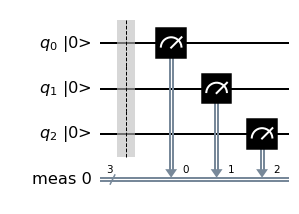

In [12]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

qc_output = QuantumCircuit(3)
qc_output.measure_all()
qc_output.draw(initial_state=True)

Next Cell imports the library to connect to IBM Quantum Computers...

In [13]:
from qiskit import IBMQ

In the cell below, one needs to enter his/her IBM API token. This needs to be created once you have created an account in https://quantum-computing.ibm.com.

Replace the text below **YOUR_API_TOKEN** by the IBM API Token that you created and run the cells

In [14]:
MY_API_TOKEN=YOUR_API_TOKEN

In [15]:
IBMQ.save_account(MY_API_TOKEN)

Next cell checks your account

In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>